In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import missingno as msno

In [3]:
df=pd.read_csv('C:\\Users\\prath\\Downloads\\archive.zip')
df

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91
...,...,...,...,...,...,...,...,...
987,26191,19.69,0.18,32.60,0.81,26.22,1840,2238.49
988,132714,19.48,0.23,116.64,0.21,17.53,2156,1564.64
989,32894,22.79,0.49,39.33,0.26,29.23,503,1020.22
990,39091,13.84,0.14,37.71,0.33,23.13,2902,1201.03


In [4]:
df.head(10)

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91
5,271990,57.08,0.17,160.76,0.93,15.60,1723,2916.29
6,186979,40.09,0.25,42.25,0.61,10.60,1345,1797.10
7,176084,38.61,0.07,132.34,0.18,20.88,847,1610.31
8,98234,4.94,0.41,33.06,0.04,9.76,281,1073.30
9,262918,51.77,0.24,197.89,0.76,18.66,2577,1281.06


In [5]:
df.isnull()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
987,False,False,False,False,False,False,False,False
988,False,False,False,False,False,False,False,False
989,False,False,False,False,False,False,False,False
990,False,False,False,False,False,False,False,False


In [6]:
df.shape

(992, 8)

In [7]:
df.isnull().sum()

Sale                 0
InStrSpending        0
Discount             0
TVSpending           0
StockRate            0
Price                0
Radio                0
OnlineAdsSpending    0
dtype: int64

In [8]:
df.isnull().any()

Sale                 False
InStrSpending        False
Discount             False
TVSpending           False
StockRate            False
Price                False
Radio                False
OnlineAdsSpending    False
dtype: bool

In [9]:
df.describe()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,171327.118952,30.593034,0.251139,98.678740,0.494526,14.599829,1479.569556,1596.504284
std,81397.843301,17.493103,0.145348,57.117347,0.286810,8.715533,885.419636,927.474787
min,1992.000000,0.190000,0.000000,0.130000,0.000000,0.140000,4.000000,12.540000
25%,112479.250000,14.830000,0.130000,49.637500,0.250000,6.917500,708.250000,786.327500
50%,170390.500000,31.385000,0.250000,97.510000,0.490000,14.820000,1413.500000,1595.455000
75%,226027.250000,45.660000,0.380000,147.620000,0.740000,22.100000,2273.000000,2420.687500
max,393914.000000,59.960000,0.500000,199.910000,1.000000,29.990000,2997.000000,3198.270000


In [10]:
print('length of dataset:',len(df))

length of dataset: 992


In [11]:
x=df.drop(['Sale'],axis=1)
x

,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,2.59,0.26,82.63,0.36,4.66,2057,1608.91
...,...,...,...,...,...,...,...
987,19.69,0.18,32.60,0.81,26.22,1840,2238.49
988,19.48,0.23,116.64,0.21,17.53,2156,1564.64
989,22.79,0.49,39.33,0.26,29.23,503,1020.22
990,13.84,0.14,37.71,0.33,23.13,2902,1201.03


In [12]:
y=df['Sale']
y     

0      240368
1      207276
2      172572
3       82697
4      141762
        ...  
987     26191
988    132714
989     32894
990     39091
991     37290
Name: Sale, Length: 992, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(694, 7)
(298, 7)
(694,)
(298,)


In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
print(regressor.coef_)

[ 2.87543029e+03  3.82355848e+03  5.88866870e+02 -1.34095375e+04
 -6.47073682e+03 -4.65024310e-02  9.33417727e-02]


In [16]:
print(regressor.intercept_)

125318.33579685795


In [17]:
predicted=regressor.predict(x_test)
predicted


array([ 89224.35852814,  91573.66933934, 105049.11287868, 123974.49189193,
       139480.31224523, 227426.5222739 , 156849.8904092 , 183683.59615207,
       127232.99429621,  88819.91687482,  61757.1161527 , 218386.22008702,
       207396.60539912, 186056.58461189, 193389.73946315, 291969.86316248,
       222804.24673892, 283932.44826712, 168138.85734449, 151542.32285908,
       274131.47027673, 237557.33914893, 194433.76754878, 129837.58666733,
       334291.19377265, 190406.64241273, 245388.7143926 , 176258.1613589 ,
       181619.01547671, 126680.37797603, 103677.9729294 , 207403.63135242,
       384674.36234488, 136138.20897728, 158974.98199638, 296284.03764966,
       126292.54621409, 133458.46888746,  37283.26673704, 203509.45952328,
       120212.87470011, 265865.31343235,  77513.79003707, 186086.58864348,
       103256.2206281 , 135307.99104836, 195510.22562268, 236485.04036674,
       249023.97236971,  -8030.06664496, 201941.25186032, 139756.33027325,
       270664.41492224, 2

In [18]:
print(x_test)

     InStrSpending  Discount  TVSpending  StockRate  Price  Radio  \
239           3.89      0.20       24.08       0.92   7.74   1365   
149          24.09      0.35      106.26       0.06  25.67    862   
702          30.35      0.45       31.36       0.20  19.32    688   
247          20.98      0.26       51.93       0.82  12.72   1882   
949          36.47      0.42      169.48       0.58  28.49    574   
..             ...       ...         ...        ...    ...    ...   
203          31.74      0.24       96.61       0.69  23.25    865   
420           5.32      0.41        4.74       0.40  18.02   2887   
729          31.26      0.39       93.61       0.86   6.34   2042   
278          40.01      0.14       88.46       0.92   3.03   2526   
218          36.21      0.27       44.54       0.44  15.77    847   

     OnlineAdsSpending  
239            2782.53  
149             251.23  
702              27.19  
247            1572.26  
949             466.01  
..                 ..

In [19]:
predicted.shape

(298,)

In [20]:
dframe=pd.DataFrame(y_test,predicted)
dframe

,Sale
89224.358528,NaN
91573.669339,NaN
105049.112879,NaN
123974.491892,NaN
139480.312245,NaN
...,...
114851.028855,NaN
22915.106167,NaN
219275.028449,NaN
261010.761682,NaN


In [21]:
dfr=pd.DataFrame({'Actual Sale':y_test,'Predicted Sale':predicted})
dfr

,Actual Sale,Predicted Sale
239,87100,89224.358528
149,88686,91573.669339
702,103664,105049.112879
247,123394,123974.491892
949,137638,139480.312245
...,...,...
203,114024,114851.028855
420,28181,22915.106167
729,217569,219275.028449
278,258744,261010.761682


In [22]:
df.head(60)

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91
5,271990,57.08,0.17,160.76,0.93,15.60,1723,2916.29
6,186979,40.09,0.25,42.25,0.61,10.60,1345,1797.10
7,176084,38.61,0.07,132.34,0.18,20.88,847,1610.31
8,98234,4.94,0.41,33.06,0.04,9.76,281,1073.30
9,262918,51.77,0.24,197.89,0.76,18.66,2577,1281.06


In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
train_accuracy=regressor.score(x_train,y_train)
print('train_accuracy:',train_accuracy)
l_test_accuracy=regressor.score(x_test,y_test)
print('train_accuracy:',l_test_accuracy)


train_accuracy: -0.029249848721371263
train_accuracy: -0.014050250014875143


C:\Users\prath\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\prath\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [24]:
import math
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Absolute Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))


Mean Absolute Error: 2402.7001440555837
Mean Squared Error: 10119074.246788682
Root Mean Absolute Error: 3181.0492367752945


In [25]:
graph=dfr.head(30)
graph

,Actual Sale,Predicted Sale
239,87100,89224.358528
149,88686,91573.669339
702,103664,105049.112879
247,123394,123974.491892
949,137638,139480.312245
325,229134,227426.522274
44,157750,156849.890409
809,184658,183683.596152
360,125676,127232.994296
842,87385,88819.916875


In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [27]:
predicted=regressor.predict(x_test)
predicted

array([117749.69,  69069.57, 110575.72, 131525.28, 147594.11, 218116.79,
       150738.61, 180807.1 , 114949.82, 103959.25,  81202.05, 218974.27,
       194246.73, 169917.99, 205035.82, 275817.53, 231636.12, 301253.43,
       170896.34, 152970.53, 284070.88, 226603.37, 200324.51, 122837.67,
       317937.17, 196532.36, 249953.6 , 155416.83, 177764.44, 129087.96,
        90122.03, 190425.26, 359967.72, 146573.55, 158478.24, 290725.94,
       117036.98, 131319.12,  52150.72, 205504.86, 107126.45, 250032.35,
        70032.6 , 179294.21, 116220.11, 135085.42, 192711.2 , 248386.87,
       237957.28,  22492.45, 177206.67, 130443.72, 253262.93, 223610.54,
       305592.19, 128151.68, 282811.03, 210951.94, 264587.28, 237477.32,
       252373.83,  99457.76, 132655.2 ,  40674.52, 110555.71,  69346.38,
        58747.27, 133089.67, 122094.88,  91617.18, 143747.63, 269515.35,
       196493.6 , 163921.56,  56770.1 ,  89088.38, 176850.65, 286377.37,
       107159.21, 133227.51, 234042.34, 263233.58, 

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
train_accuracy=regressor.score(x_train,y_train)
print('train_accuracy:',train_accuracy)
R_test_accuracy=regressor.score(x_test,y_test)
print('test_accuracy:',R_test_accuracy)

train_accuracy: 0.9961244165542673
test_accuracy: 0.9735146344409228


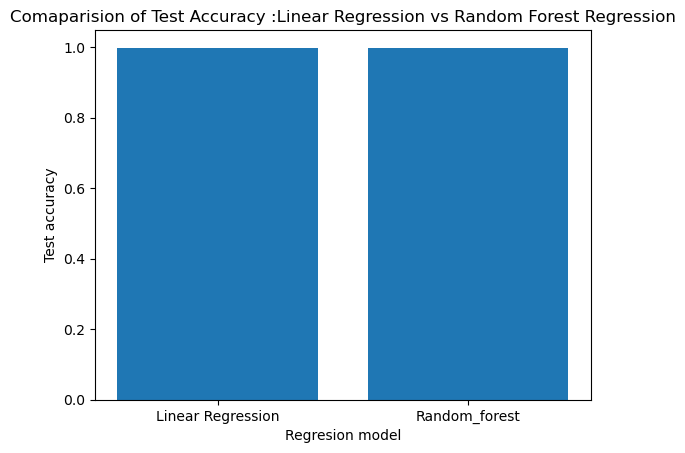

In [45]:
import matplotlib.pyplot as plt
linear_regression_accuracy=0.9985140705476939
random_forest_accuracy=0.9961244165542673
accuracy_scores=[linear_regression_accuracy,random_forest_accuracy]
model_names=['Linear Regression','Random_forest']
plt.bar(model_names,accuracy_scores)
plt.xlabel('Regresion model')
plt.ylabel('Test accuracy')
plt.title('Comaparision of Test Accuracy :Linear Regression vs Random Forest Regression')
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(_train)
x_test=scaler.transform(x_test)

In [41]:
from sklearn.neural_network import MLPRegressor
ann_model=MLPRegressor(hidden_layer_sizes=(128,64,32),activation='relu',solver='lbfgs')
ann_model.fit(x_train,y_train)

C:\Users\prath\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(128, 64, 32), solver='lbfgs')

In [42]:
y_pred=ann_model.predict(x_test)
y_pred

array([ 89557.72173769,  91288.9978221 , 105788.14630415, 121560.29782065,
       137554.54076813, 226933.49146004, 155094.04000319, 182261.35425428,
       126188.58993795,  88620.5403847 ,  62956.70859143, 217866.59878652,
       205340.86027603, 184735.58333459, 192058.44760618, 294380.17193713,
       222185.27166672, 285727.04965959, 165802.85511253, 148758.2754904 ,
       275097.5204013 , 237328.53128174, 193696.98319692, 129344.27723828,
       340063.73063066, 188695.57678187, 244713.23303939, 175859.55625882,
       179525.60891498, 124541.16902765, 102922.74199672, 205505.30281972,
       397254.29936612, 133345.47617986, 156631.0932626 , 301229.4826001 ,
       123919.98955262, 131093.66141243,  41377.15950739, 200978.99057197,
       118296.96520406, 266178.14350724,  78380.32984988, 183714.04917154,
       102497.05339205, 133654.4047791 , 193179.37006999, 235318.66682133,
       249451.97776371,  11089.950701  , 199244.65846753, 138561.58567851,
       272905.55576354, 2

In [43]:
train_accuracy=ann_model.score(x_train,y_train)
print('train_accuracy(R_Squared):',train_accuracy)
test_accuracy=ann_model.score(x_test,y_test)
print('test_accuracy(R_Squared):',test_accuracy)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Absolute Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

train_accuracy(R_Squared): 0.9996068787943125
test_accuracy(R_Squared): 0.9993857268715692
Mean Absolute Error: 10744.75197986577
Mean Squared Error: 180889999.5214849
Root Mean Absolute Error: 13449.53529016839


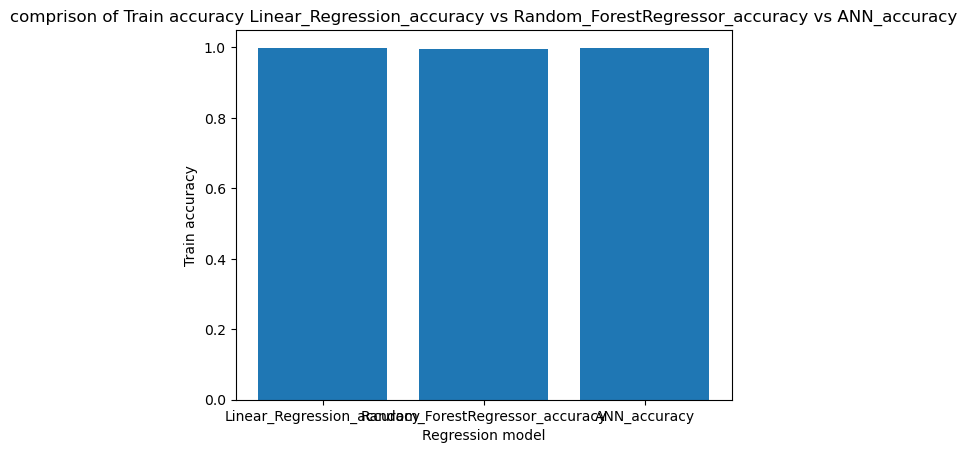

In [46]:
import matplotlib.pyplot as plt
Linear_Regression_accuracy=0.9985140705476939
Random_ForestRegressor_accuracy=0.9961244165542673
ANN_accuracy=  0.9996068787943125
accuracy_score=[Linear_Regression_accuracy,Random_ForestRegressor_accuracy,ANN_accuracy]
model_names=['Linear_Regression_accuracy','Random_ForestRegressor_accuracy','ANN_accuracy']
plt.bar(model_names,accuracy_score)
plt.xlabel('Regression model')
plt.ylabel('Train accuracy')
plt.title('comprison of Train accuracy Linear_Regression_accuracy vs Random_ForestRegressor_accuracy vs ANN_accuracy')
plt.show()